In [306]:
import matplotlib.pyplot as plt
import mlflow
import numpy as np
import torch

from src.model.lightning import LightningModule
from src.preprocessing.dataloader import Dataloader
from src.utils.features import generate_saliency_map
from src.utils.mlflow import MLFlowHandler

In [ ]:
mlflowhandler = MLFlowHandler.login()
model = mlflow.pytorch.load_model("mlflow-artifacts:/0/c1172abbfc3b45469e0bb755b7cc4168/artifacts/model" )

In [253]:
dataloader = Dataloader(workers=12)
data = next(iter(dataloader.test_loader))

In [254]:
activation={}
def forward_hook1(module,input,output):
    activation['layer1_output'] = output
def forward_hook2(module,input,output):
    activation['layer2_output'] = output
def forward_hook3(module,input,output):
    activation['layer3_output'] = output
layer1 = model.layers['conv1']
layer2 = model.layers['conv2']
layer3 = model.layers['conv3']
hook1 = layer1.register_forward_hook(forward_hook1)
hook2 = layer2.register_forward_hook(forward_hook2)
hook3 = layer3.register_forward_hook(forward_hook3)


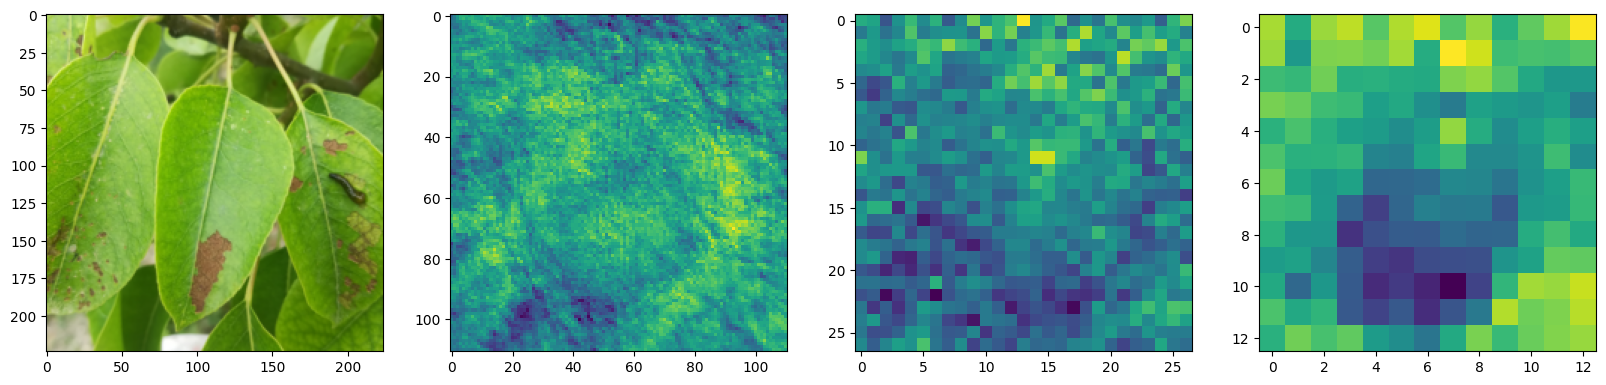

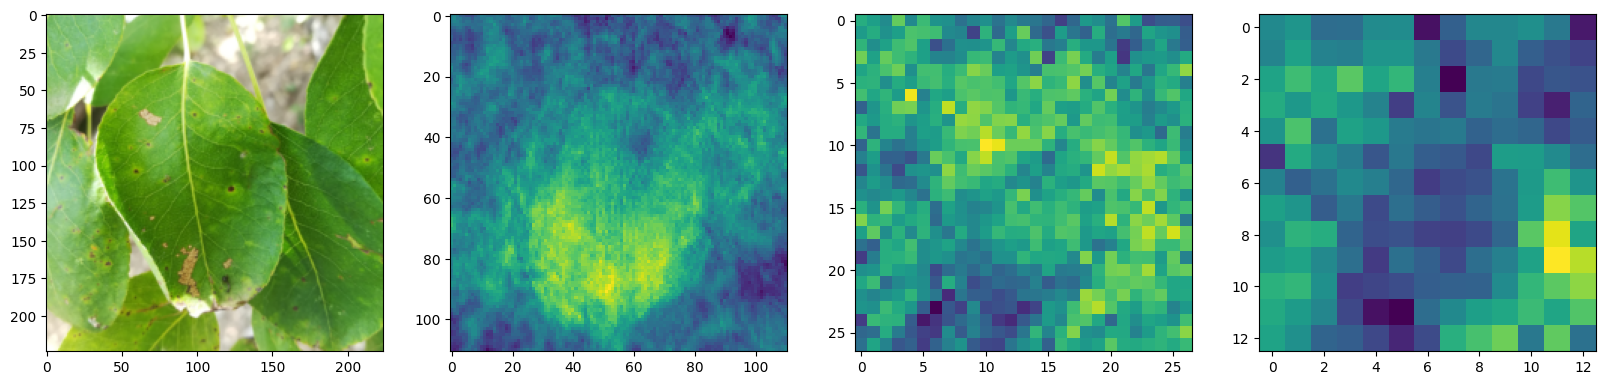

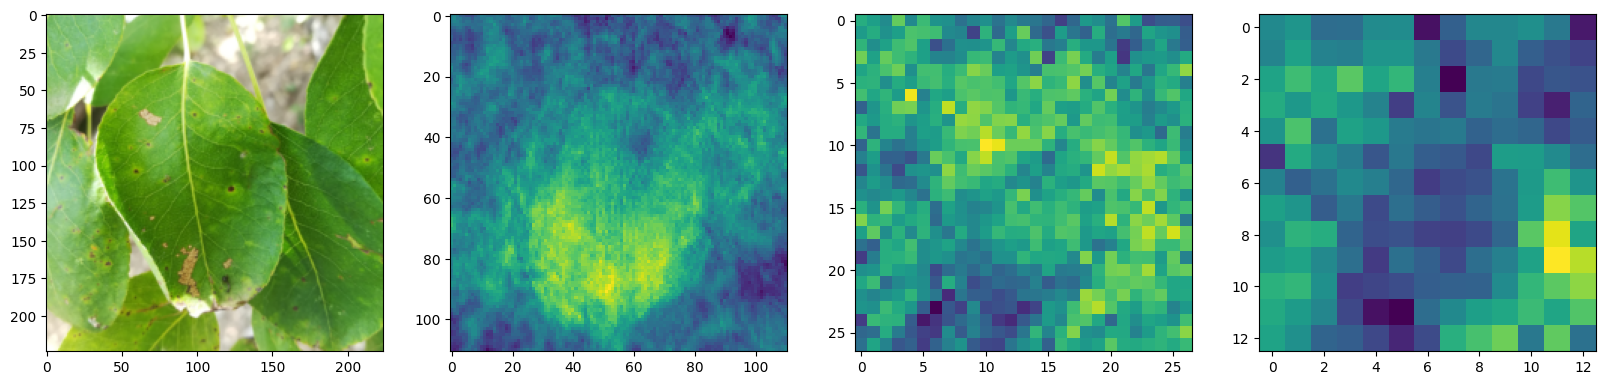

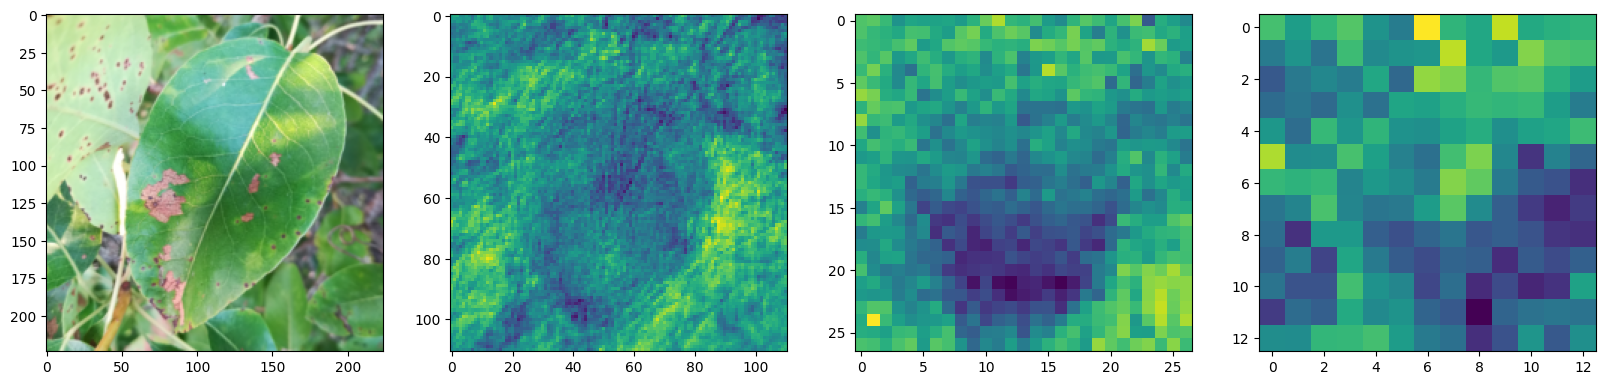

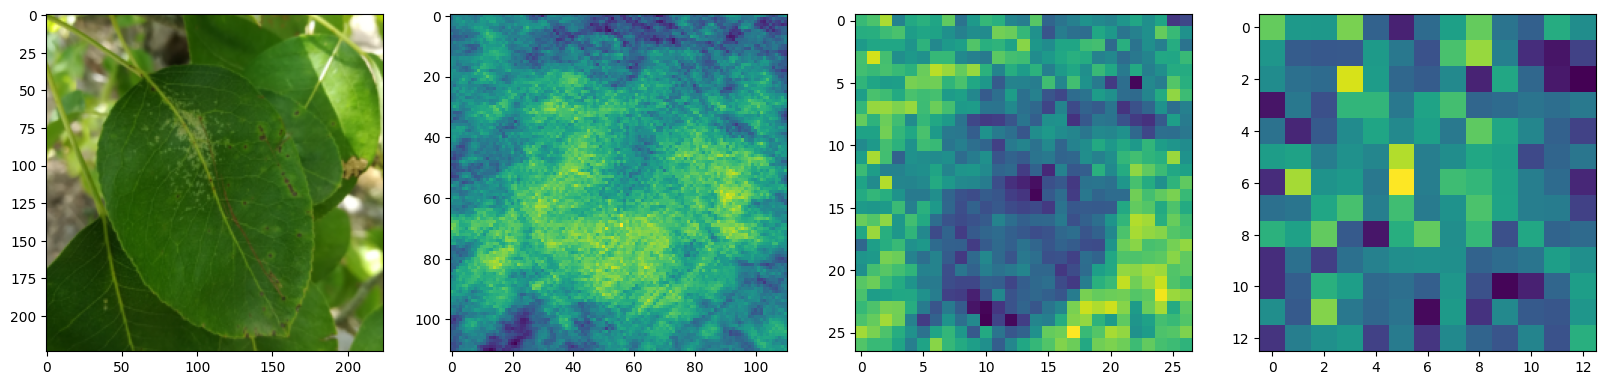

In [255]:
output = model(data[0])
activation_map1 = activation['layer1_output'].squeeze(0).mean(dim=0)
activation_map2 = activation['layer2_output'].squeeze(0).mean(dim=0)
activation_map3 = activation['layer3_output'].squeeze(0).mean(dim=0)

numbers = [np.random.randint(0,32) for i in range(5)]
for i in numbers:
    fig, ax = plt.subplots(1,4,figsize=(20,5))
    ax[0].imshow(data[0][i].permute(1,2,0))
    ax[1].imshow(activation_map1[i].detach().numpy())
    ax[2].imshow(activation_map2[i].detach().numpy())
    ax[3].imshow(activation_map3[i].detach().numpy())
plt.show()

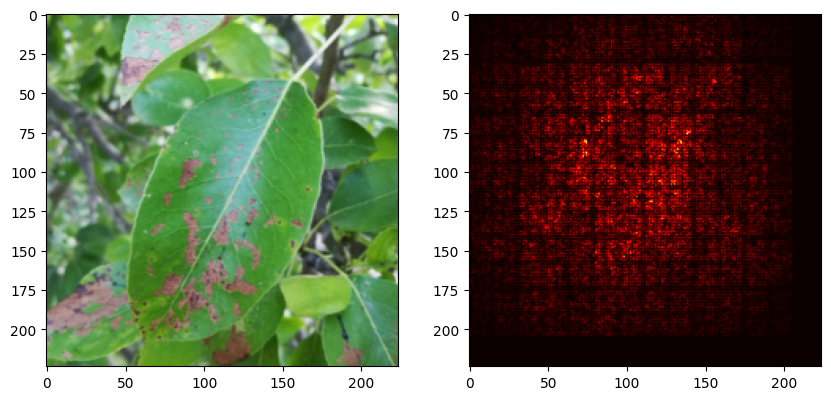

In [307]:
generate_saliency_map(data,model,8)

In [ ]:
import torchvision.models as models

resnet = models.resnet18(pretrained=True)
resnet.fc = torch.nn.Linear(resnet.fc.in_features, 4)
resnet.train()
lightning = LightningModule(resnet, optimizer=torch.optim.SGD(resnet.parameters(), lr=0.01),epochs=5)
model_resnet,result = lightning.train_model_lightning(dataloader)

In [ ]:
model_resnet.eval()

In [206]:
activation={}
hook = model_resnet.layer1[0].register_forward_hook(forward_hook1)
hook2 = model_resnet.layer2[0].register_forward_hook(forward_hook2)
hook3 = model_resnet.layer3[0].register_forward_hook(forward_hook3)
output = model_resnet(data[0])

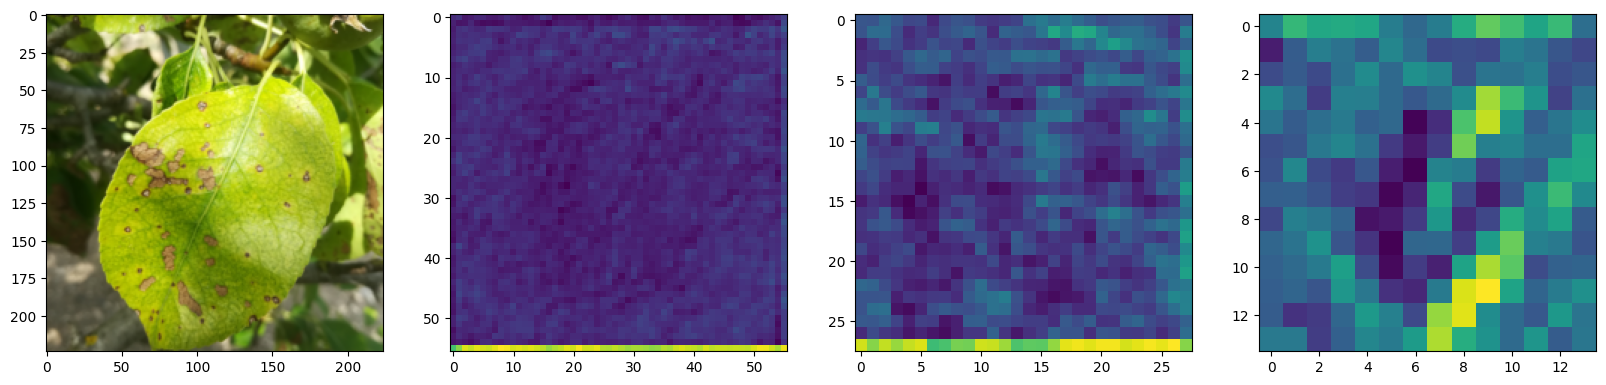

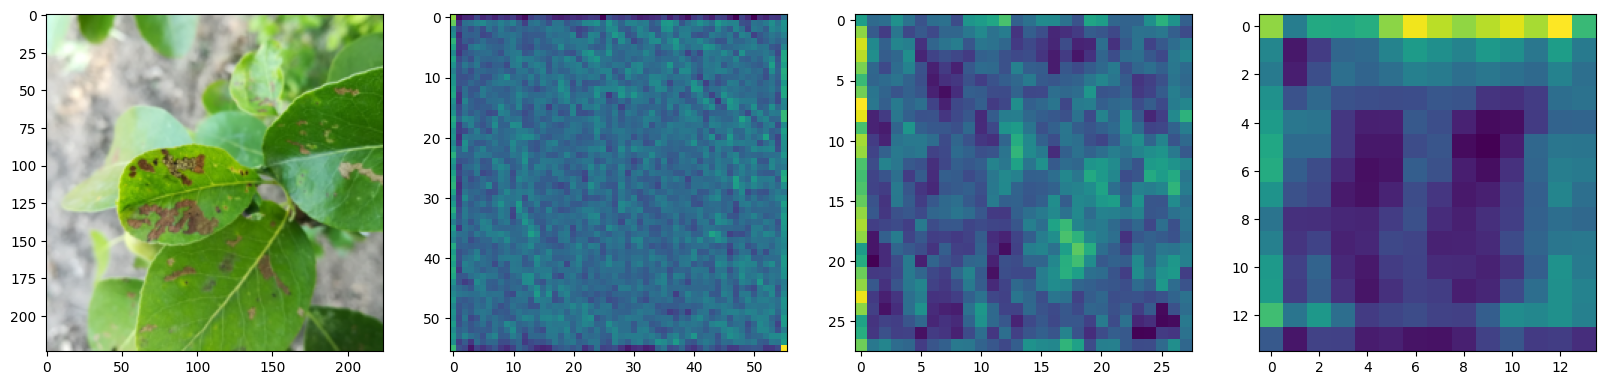

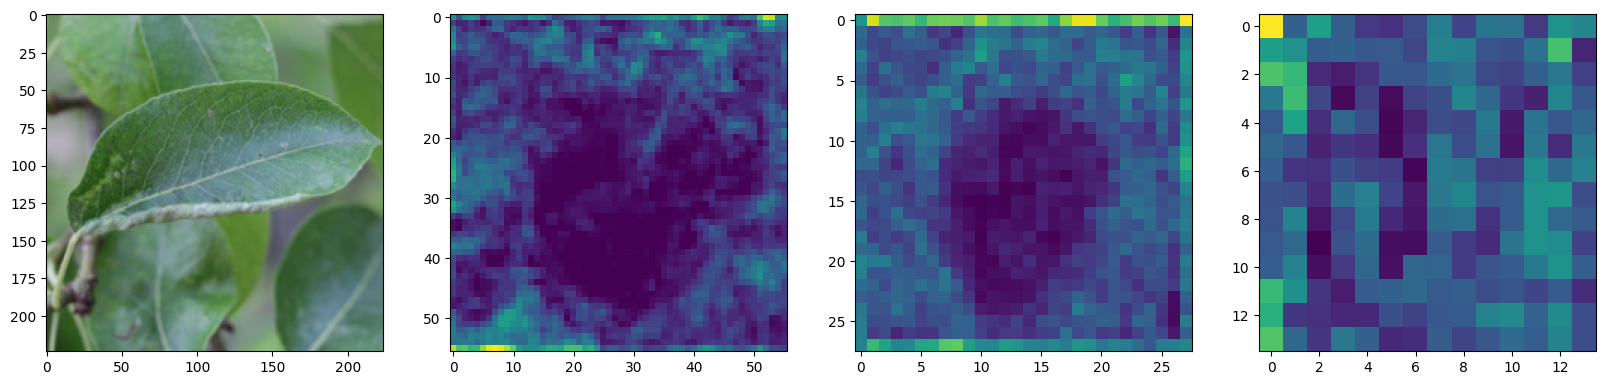

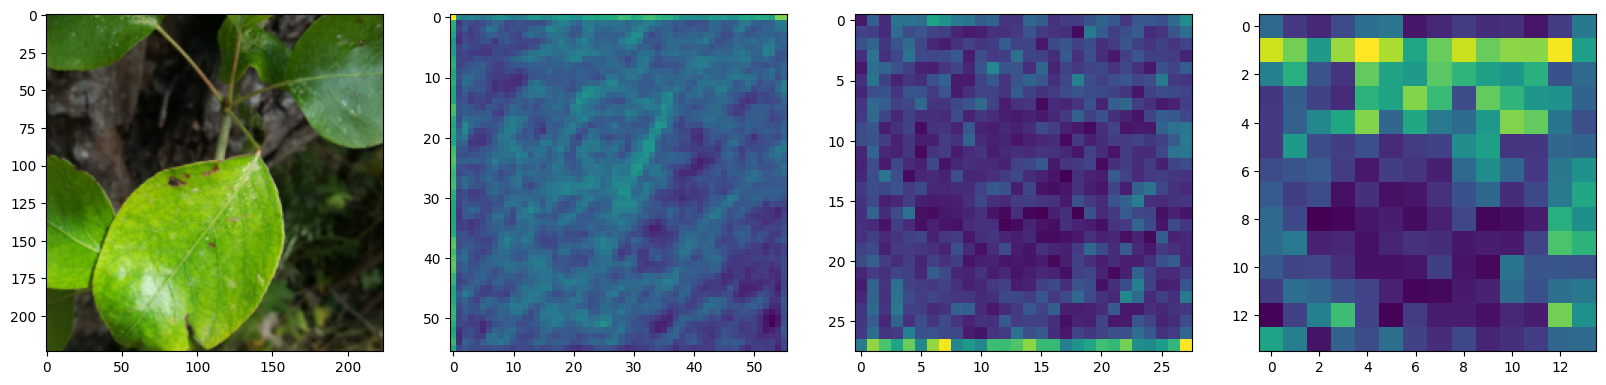

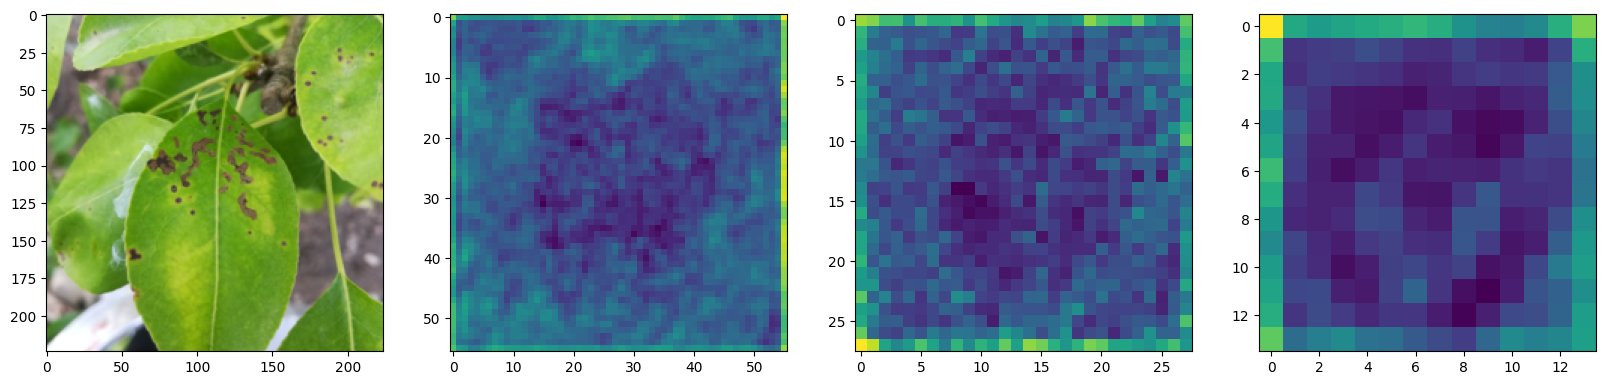

In [207]:
activation_map1 = activation['layer1_output'].squeeze(0).mean(dim=0)
activation_map2 = activation['layer2_output'].squeeze(0).mean(dim=0)
activation_map3 = activation['layer3_output'].squeeze(0).mean(dim=0)
for i in numbers:
    fig, ax = plt.subplots(1,4,figsize=(20,5))
    ax[0].imshow(data[0][i].permute(1,2,0))
    ax[1].imshow(activation_map1[i].detach().numpy())
    ax[2].imshow(activation_map2[i].detach().numpy())
    ax[3].imshow(activation_map3[i].detach().numpy())
plt.show()

In [208]:
result

[{'Accuracy': 0.8604651093482971,
  'Precision': 0.8621542453765869,
  'Recall': 0.8604651093482971,
  'F1': 0.8532431721687317}]

/tmp/ipykernel_3794/742707421.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(data_in[0][batch_index].unsqueeze(0),requires_grad=True)


tensor(5.9854, grad_fn=<SelectBackward0>)


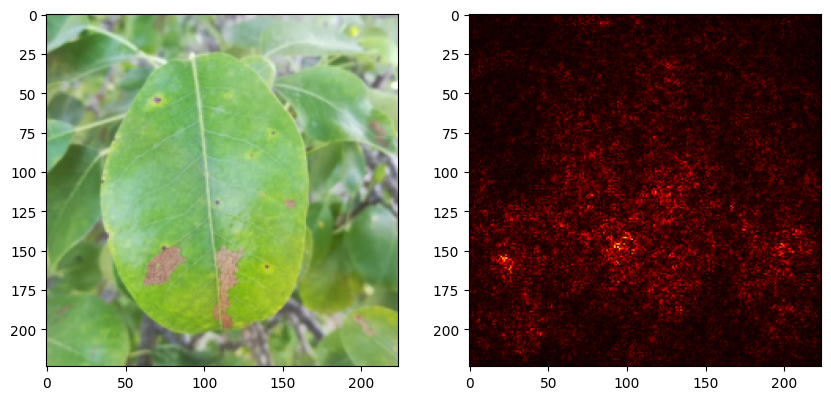

In [ ]:
generate_saliency_map(data,resnet,5)

/tmp/ipykernel_3794/2459026762.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_data = torch.tensor(data[0][batch_index].unsqueeze(0),requires_grad=True)


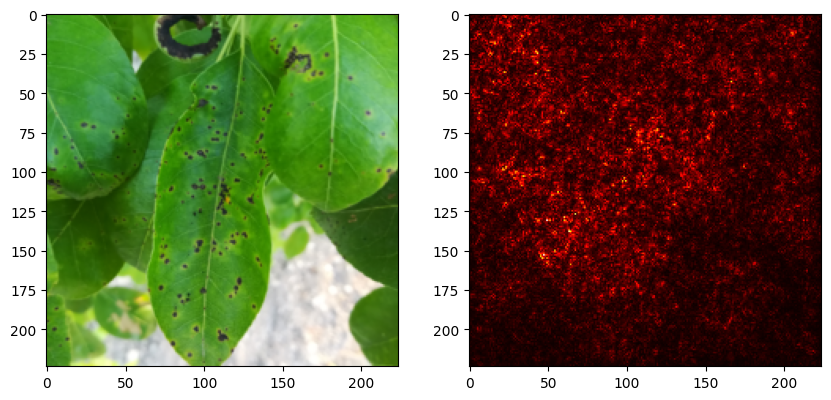

In [299]:
generate_saliency_map(data,resnet,31)